<a href="https://colab.research.google.com/github/xrios01/xar-csci1101projects/blob/main/Test_data_exploration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
##########################################################################################################################
# import libs and create a list of columns to keep
##########################################################################################################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches  # Import patches to create custom legend


# Specify the column names you want to keep
columns_to_keep = [
    "away_team", "qb_dropback", "qb_kneel", "qb_spike", "qb_scramble",
    "total_home_pass_epa", "total_away_pass_epa", "total_home_pass_wpa", "total_away_pass_wpa",
    "first_down_pass", "incomplete_pass", "interception", "fumble_forced",
    "fumble_not_forced", "fumble_out_of_bounds", "fumble_lost", "qb_hit",
    "rush_attempt", "pass_attempt", "sack", "touchdown", "pass_touchdown",
    "rush_touchdown", "fumble", "complete_pass", "passer_player_id", "passer_player_name",
    "passing_yards", "rusher_player_id", "rusher_player_name", "rushing_yards",
    "time_of_day", "weather", "drive_time_of_possession", "roof", "surface",
    "temp", "wind", "pass", "passer_id", "qb_epa", "xpass", "pass_oe", 'posteam', 'td_team'
]

In [65]:
##########################################################################################################################
# specify root file path and filter out columns we want to keep and send them to a new file. Also sum up the missing columns
# in the file an print the missing totals
##########################################################################################################################

#filepath = 'nfl_play_by_play_2019.csv'
filepath = '/content/drive/MyDrive/nfl_play_by_play_2019.csv'

#load only the specified columns
df = pd.read_csv(filepath, usecols = columns_to_keep)

#count missing entries in each column
missing_counts = df.isna().sum()

#print the counts of missing entries
print(missing_counts)

#save the DataFrame if needed
df.to_csv('nfl_play_by_play_2019_filtered.csv', index = False)


away_team                       0
posteam                      2439
qb_dropback                  1407
qb_kneel                        0
qb_spike                        0
qb_scramble                     0
td_team                     45862
total_home_pass_epa             0
total_away_pass_epa             0
total_home_pass_wpa             0
total_away_pass_wpa             0
first_down_pass              1466
incomplete_pass              1466
interception                 1466
fumble_forced                1466
fumble_not_forced            1466
fumble_out_of_bounds         1466
fumble_lost                  1466
qb_hit                       1466
rush_attempt                 1466
pass_attempt                 1466
sack                         1466
touchdown                    1466
pass_touchdown               1466
rush_touchdown               1466
fumble                       1466
complete_pass                1466
passer_player_id            27275
passer_player_name          27275
passing_yards 

In [69]:
##########################################################################################################################
# filter out every row where the passer id is not null or the passer id is null while the rusher id is also not null.
# Then count whats missing and send to new file
##########################################################################################################################


new_file = df[(df['passer_player_id'].notnull() | (df['passer_player_id'].isnull()) & df['rusher_player_id'].notnull())]

new_file.to_csv('nfl_play_by_play_2019_master_column_filtered1.csv', index = False)

#count missing entries in each column
missing_counts = new_file.isna().sum()

#print the counts of missing entries
print(missing_counts)

away_team                       0
posteam                         0
qb_dropback                     0
qb_kneel                        0
qb_spike                        0
qb_scramble                     0
td_team                     32638
total_home_pass_epa             0
total_away_pass_epa             0
total_home_pass_wpa             0
total_away_pass_wpa             0
first_down_pass                 0
incomplete_pass                 0
interception                    0
fumble_forced                   0
fumble_not_forced               0
fumble_out_of_bounds            0
fumble_lost                     0
qb_hit                          0
rush_attempt                    0
pass_attempt                    0
sack                            0
touchdown                       0
pass_touchdown                  0
rush_touchdown                  0
fumble                          0
complete_pass                   0
passer_player_id            14028
passer_player_name          14028
passing_yards 

In [70]:
##########################################################################################################################
# filter out every row where the passer id is not null or the passer id is null while the rusher id is also not null.
# Then count whats missing and send to new file
##########################################################################################################################


qb = [ 'L.Jackson', 'P.Mahomes', 'R.Wilson', 'D.Brees', 'D.Watson', 'R.Tannehill', 'A.Rodgers',
'K.Cousins', 'M.Stafford', 'C.Wentz', 'D.Prescott', 'M.Ryan', 'K.Murray', 'T.Brady', 'J.Garoppolo',
'D.Carr', 'R.Fitzpatrick', 'J.Allen', 'T.Bridgewater', 'J.Goff', 'P.Rivers', 'J.Winston', 'D.Jones',
'B.Mayfield', 'G.Minshew', 'S.Darnold', 'J.Brissett', 'D.Haskins', 'D.Lock', 'A.Dalton', 'M.Trubisky',
'M.Moore', 'J.Flacco', 'C.Keenum', 'M.Mariota', 'K.Allen', 'B.Roethlisberger', 'E.Manning', 'N.Foles',
'C.Newton', 'M.Schaub', 'J.Driskel', 'R.Griffin', 'B.Hoyer', 'D.Hodges', 'D.Blough', 'B.Allen',
'M.Rudolph', 'C.McCoy', 'A.McCarron', 'J.Rosen', 'S.Mannion', 'R.Finley', 'T.Siemian', 'L.Falk',
'W.Grier' ]


new_filtered_file = new_file[new_file['passer_player_name'].isin(qb) | new_file['rusher_player_name'].isin(qb)]


# Save the filtered DataFrame to CSV
new_filtered_file.to_csv('nfl_play_by_play_2019_filtered_by_player.csv', index=False)

# Count missing entries in each column in the filtered DataFrame
missing_counts = new_filtered_file.isna().sum()

# Print the counts of missing entries
print(missing_counts)


away_team                       0
posteam                         0
qb_dropback                     0
qb_kneel                        0
qb_spike                        0
qb_scramble                     0
td_team                     20152
total_home_pass_epa             0
total_away_pass_epa             0
total_home_pass_wpa             0
total_away_pass_wpa             0
first_down_pass                 0
incomplete_pass                 0
interception                    0
fumble_forced                   0
fumble_not_forced               0
fumble_out_of_bounds            0
fumble_lost                     0
qb_hit                          0
rush_attempt                    0
pass_attempt                    0
sack                            0
touchdown                       0
pass_touchdown                  0
rush_touchdown                  0
fumble                          0
complete_pass                   0
passer_player_id             1819
passer_player_name           1819
passing_yards 

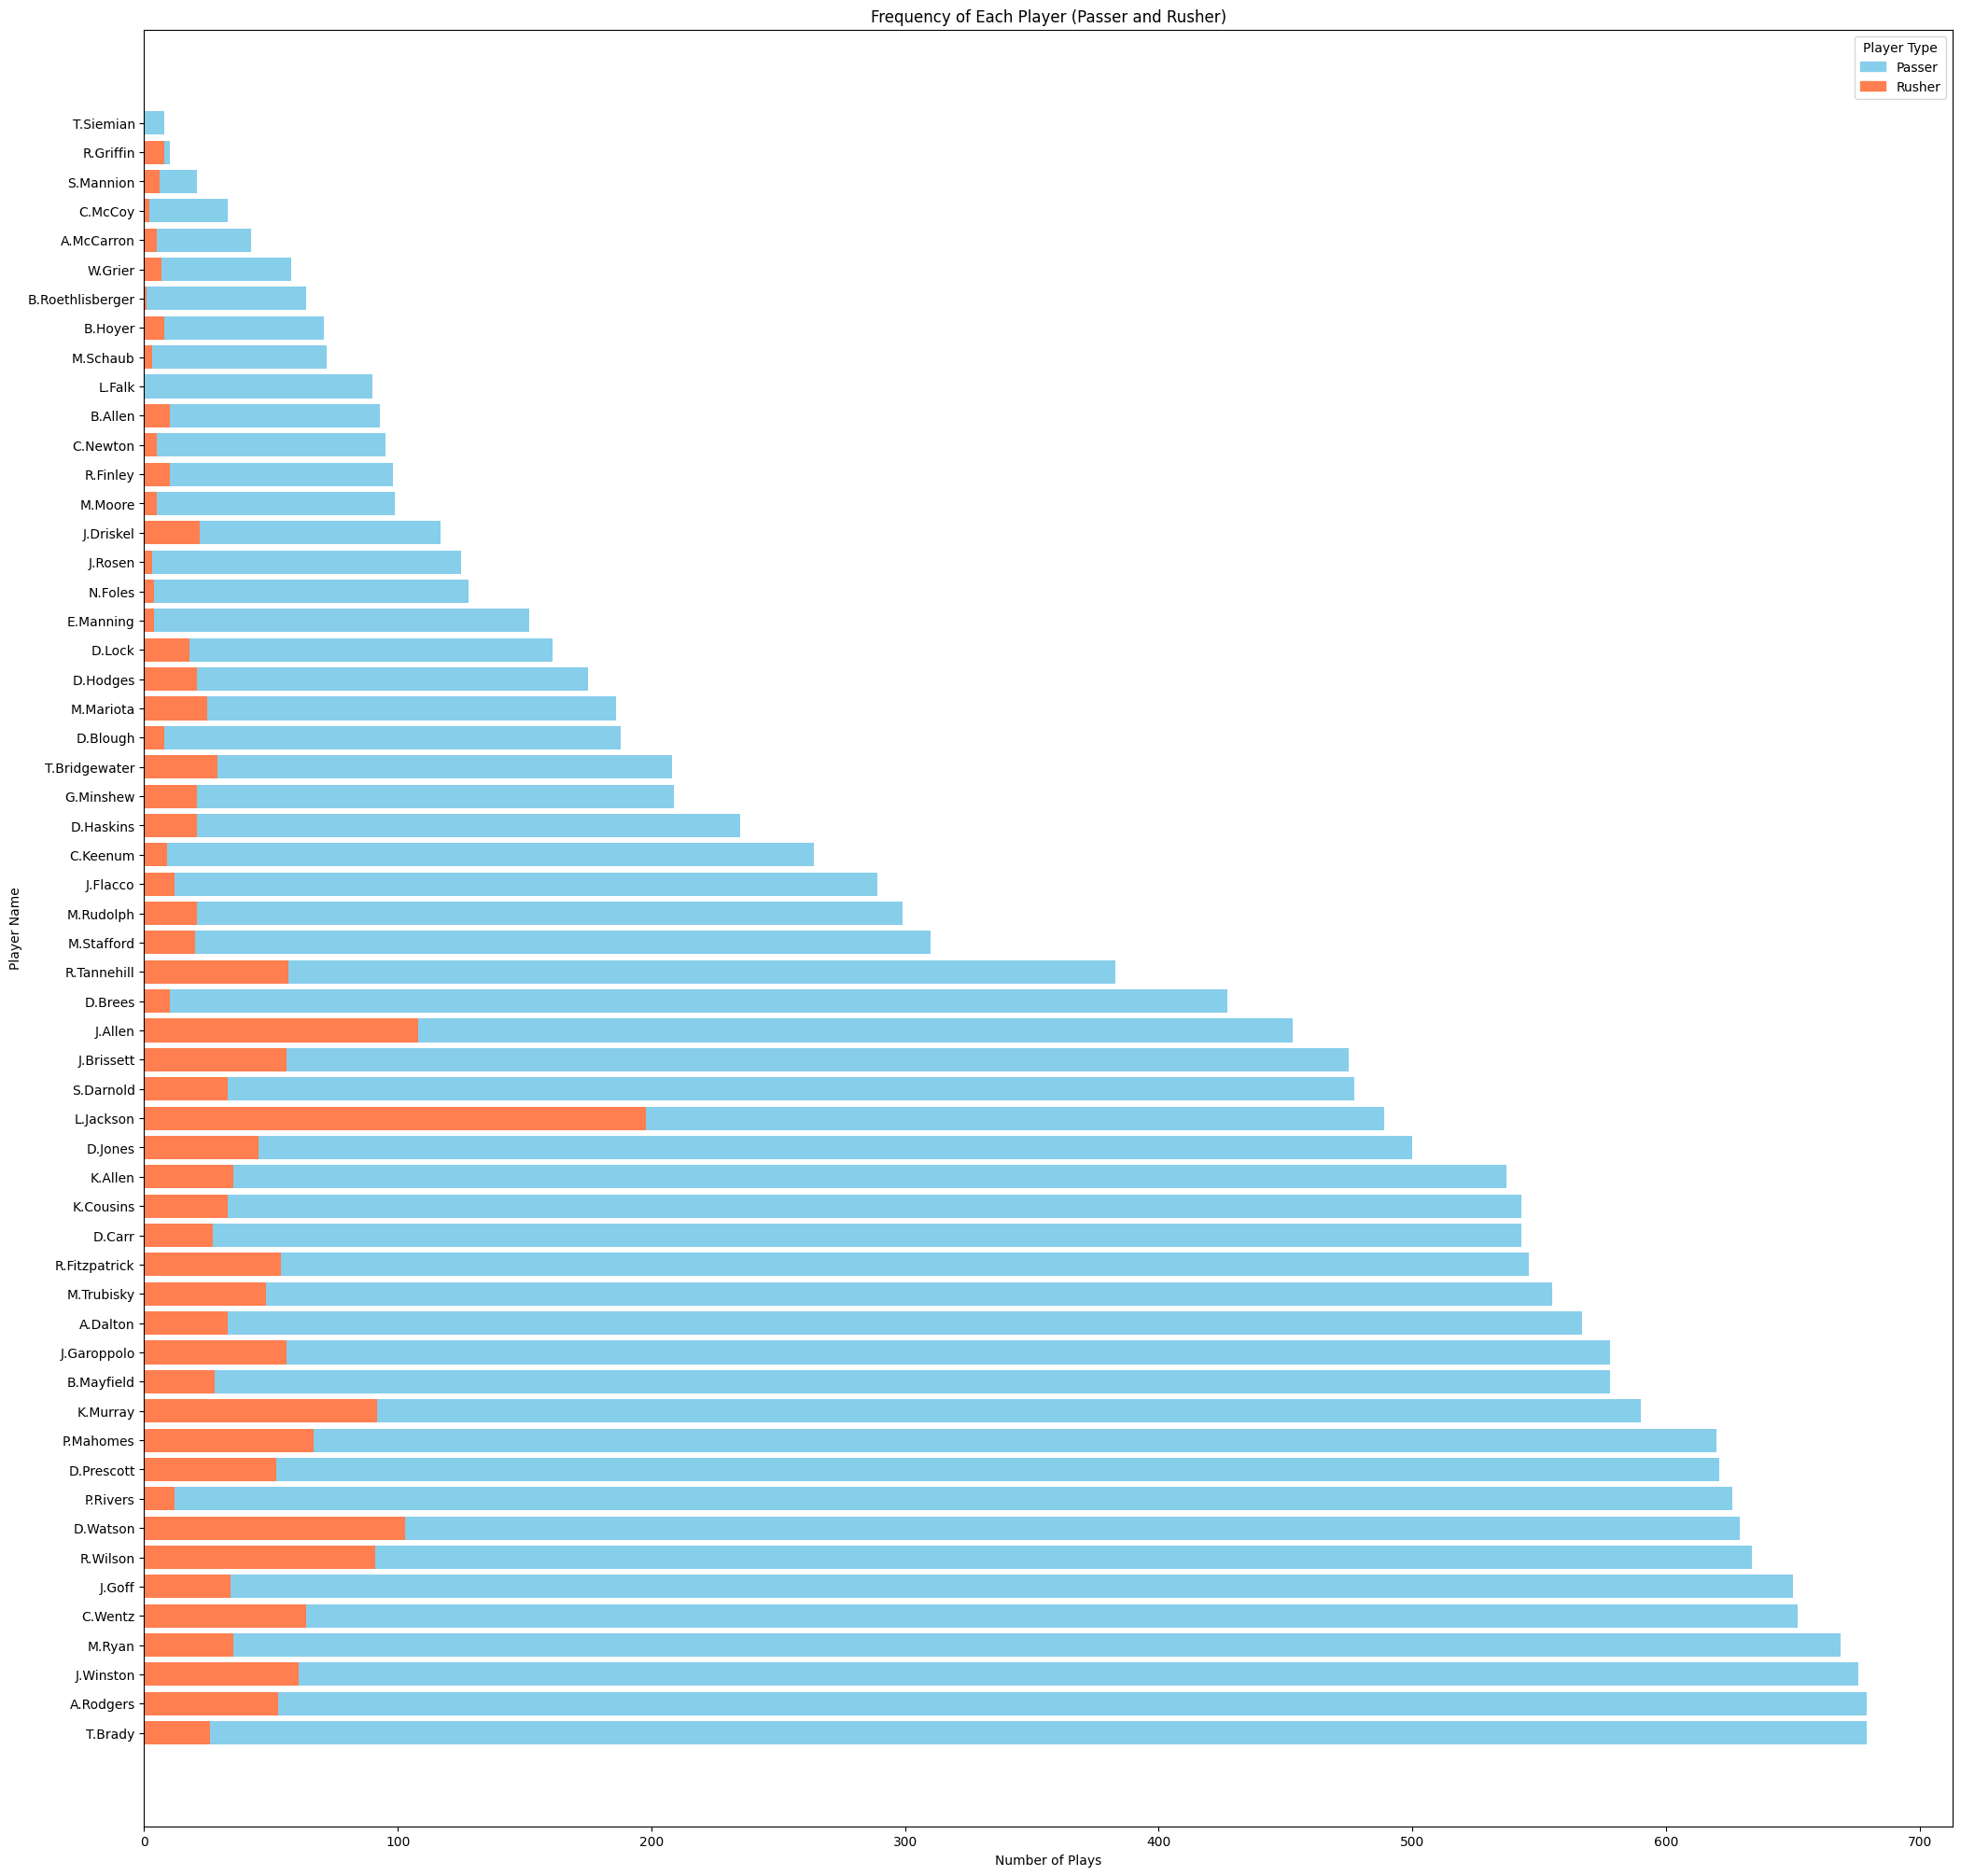

In [71]:
##########################################################################################################################
# Graph the number of times each qb made a play and color coded their bars based on weather they were rushing or passing
# for the play
##########################################################################################################################


# Count occurrences for passer player names
passer_counts = new_filtered_file['passer_player_name'].value_counts()
passer_counts = passer_counts.reset_index()
passer_counts.columns = ['Player Name', 'Number of Plays']
passer_counts['Player Type'] = 'Passer'  # Add a column to identify player type

# Count occurrences for rusher player names
rusher_counts = new_filtered_file['rusher_player_name'].value_counts()
rusher_counts = rusher_counts.reset_index()
rusher_counts.columns = ['Player Name', 'Number of Plays']
rusher_counts['Player Type'] = 'Rusher'  # Add a column to identify player type

# Combine passer and rusher data
all_counts = pd.concat([passer_counts, rusher_counts])

# Plotting
plt.figure(figsize = (25, 25))  # Set the figure size for better readability

# Group data by player name and sum the number of plays
all_counts_grouped = all_counts.groupby(['Player Name', 'Player Type'])['Number of Plays'].sum().reset_index()

# Sort by number of plays in descending order
all_counts_grouped = all_counts_grouped.sort_values(by = ['Number of Plays'], ascending = False)

# Create a color mapping for player types
colors = {'Passer': 'skyblue', 'Rusher': 'coral'}

# Create the horizontal bar plot with color mapping
plt.barh(all_counts_grouped['Player Name'], all_counts_grouped['Number of Plays'],
         color=[colors[t] for t in all_counts_grouped['Player Type']])

plt.title('Frequency of Each Player (Passer and Rusher)')
plt.xlabel('Number of Plays')
plt.ylabel('Player Name')

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color=colors[t]) for t in colors]
plt.legend(handles, colors, title='Player Type')

plt.show()

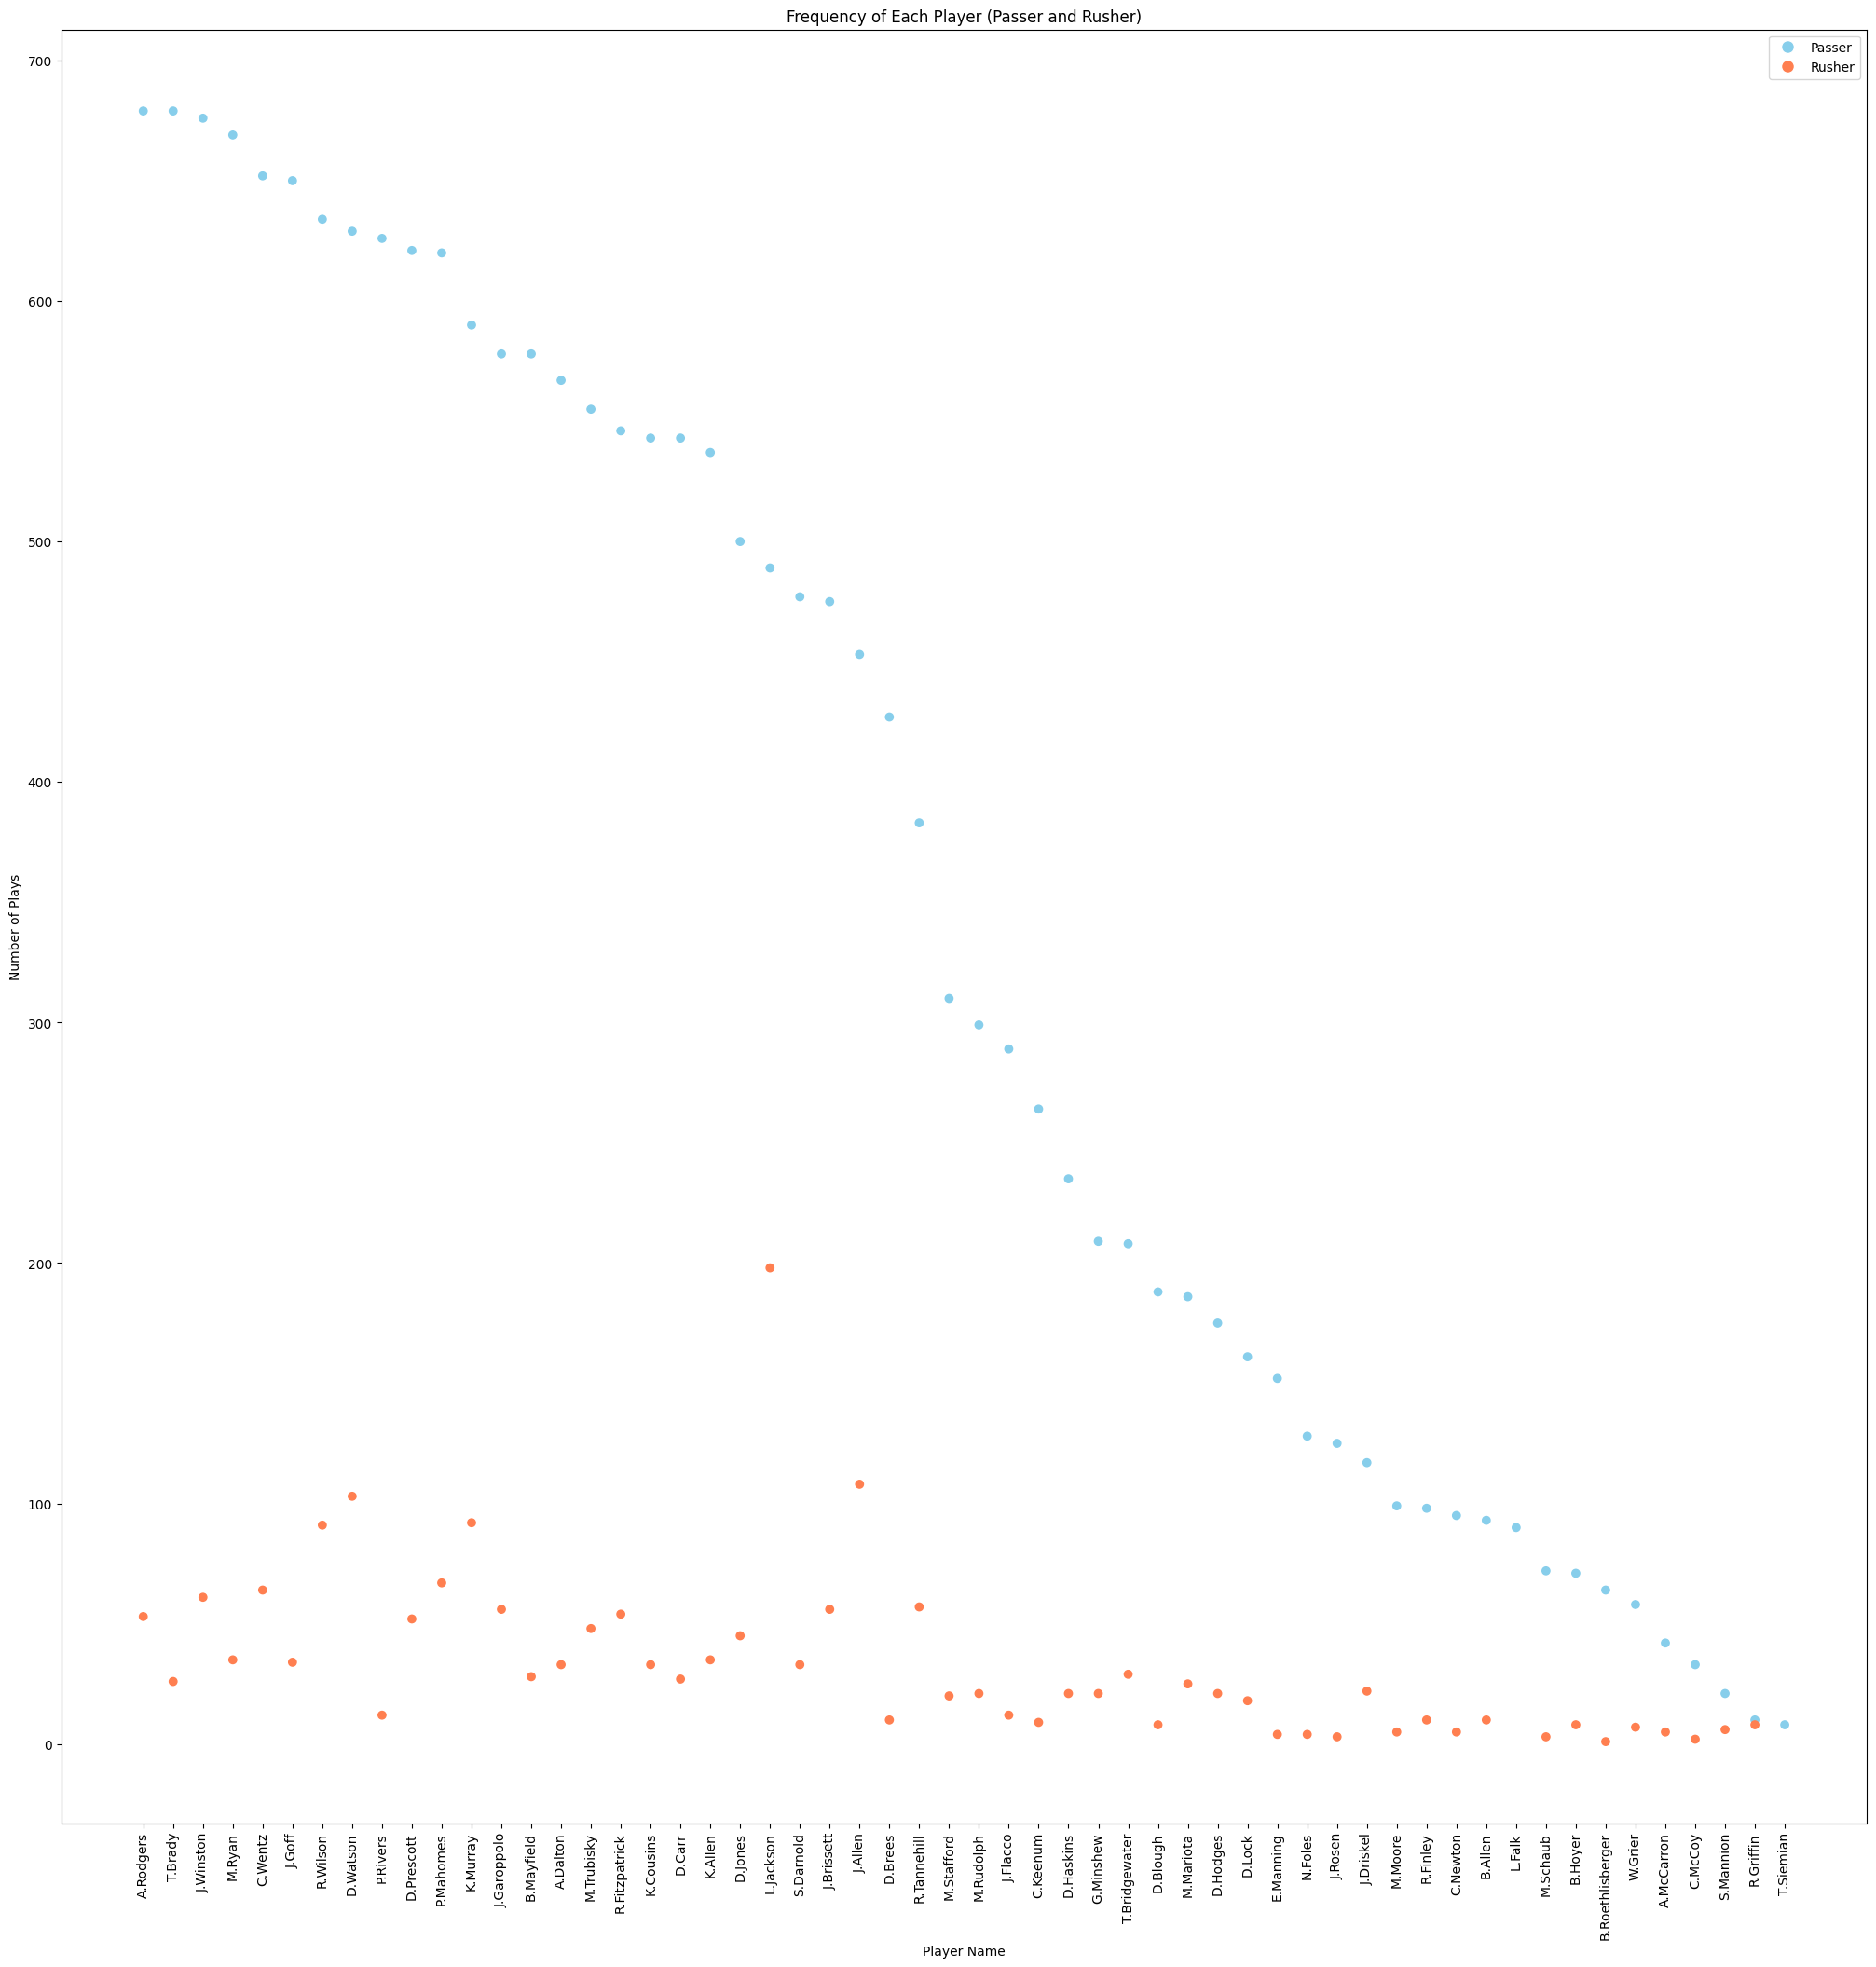

In [76]:
##########################################################################################################################
# Plot the number of times each qb made a play and color coded their dots based on weather they were rushing or passing
# for the play
##########################################################################################################################



from matplotlib.lines import Line2D # Import Line2D for creating legend handles

# Count occurrences for passer player names
passer_counts = new_filtered_file['passer_player_name'].value_counts()
passer_counts = passer_counts.reset_index()
passer_counts.columns = ['Player Name', 'Number of Plays']
passer_counts['Player Type'] = 'Passer'  # Add a column to identify player type

# Count occurrences for rusher player names
rusher_counts = new_filtered_file['rusher_player_name'].value_counts()
rusher_counts = rusher_counts.reset_index()
rusher_counts.columns = ['Player Name', 'Number of Plays']
rusher_counts['Player Type'] = 'Rusher'  # Add a column to identify player type

# Combine passer and rusher data
all_counts = pd.concat([passer_counts, rusher_counts])

# Plotting
plt.figure(figsize = (25, 25))

# Use different colors for passers and rushers
# Create a scatter plot with color mapping
scatter = plt.scatter(all_counts['Player Name'], all_counts['Number of Plays'],
                      c=all_counts['Player Type'].map({'Passer': 'skyblue', 'Rusher': 'coral'}))

plt.title('Frequency of Each Player (Passer and Rusher)')
plt.xlabel('Player Name')
plt.ylabel('Number of Plays')
plt.xticks(rotation = 90)

# Add a legend to differentiate between passers and rushers
# Create legend handles manually
handles = [Line2D([0], [0], marker='o', color='w', label=l,
                          markerfacecolor=c, markersize=10)
           for c, l in [('skyblue', 'Passer'), ('coral', 'Rusher')]]  # Use Line2D here

plt.legend(handles=handles)

plt.show()

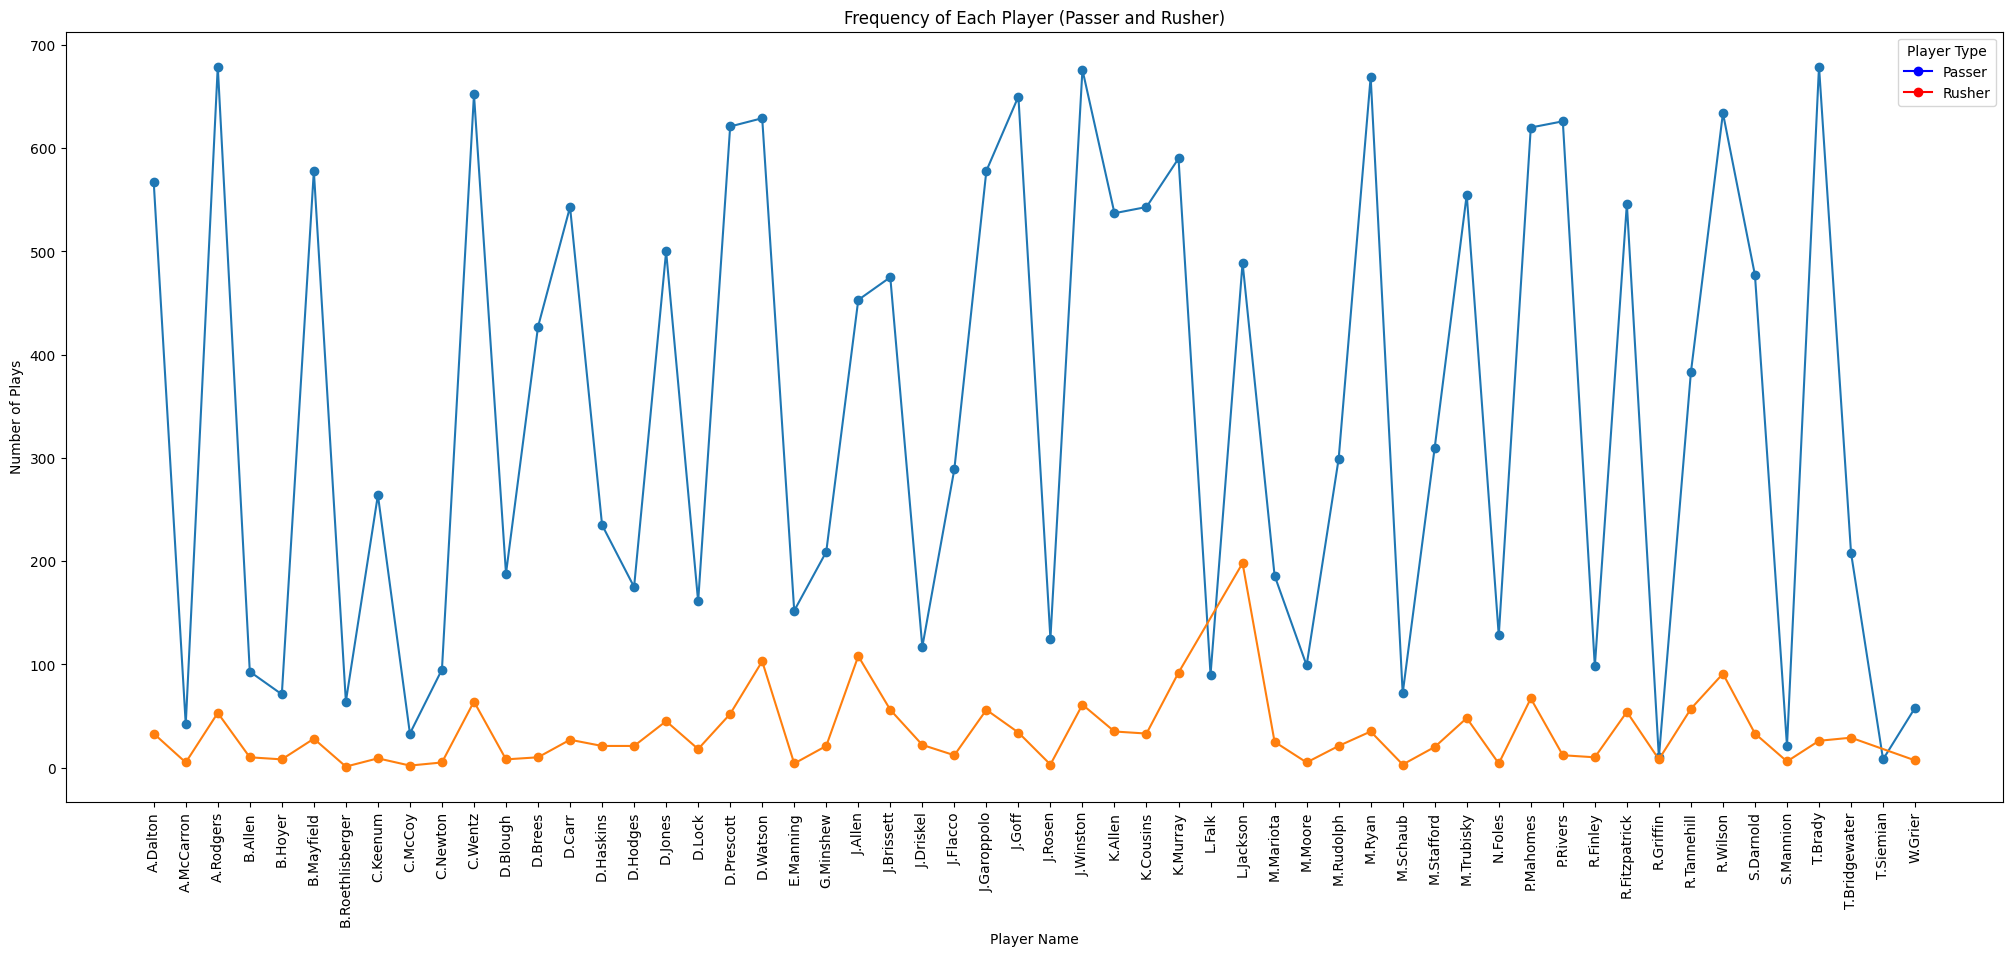

In [75]:
##########################################################################################################################
# plot the number of times each qb made a play and color coded their dots based on weather they were rushing or passing
# for the play. Dots are connected with lines
##########################################################################################################################


# Count occurrences for passer player names
passer_counts = new_filtered_file['passer_player_name'].value_counts().reset_index()
passer_counts.columns = ['Player Name', 'Number of Plays']
passer_counts['Player Type'] = 'Passer'

# Count occurrences for rusher player names
rusher_counts = new_filtered_file['rusher_player_name'].value_counts().reset_index()
rusher_counts.columns = ['Player Name', 'Number of Plays']
rusher_counts['Player Type'] = 'Rusher'

# Combine passer and rusher data
all_counts = pd.concat([passer_counts, rusher_counts])

# Sort by Player Name for line continuity
all_counts.sort_values('Player Name', inplace=True)

# Plotting
plt.figure(figsize=(25, 10))

# Plot each type with a different color and line style
for player_type, group_data in all_counts.groupby('Player Type'):
    plt.plot(group_data['Player Name'], group_data['Number of Plays'],
             label=f'{player_type}', marker='o', linestyle='-')  # Use markers to highlight points

plt.title('Frequency of Each Player (Passer and Rusher)')
plt.xlabel('Player Name')
plt.ylabel('Number of Plays')
plt.xticks(rotation = 90)

# Create legend handles manually to match the line styles
handles = [Line2D([0], [0], color='blue', marker='o', linestyle='-', label='Passer'),
           Line2D([0], [0], color='red', marker='o', linestyle='-', label='Rusher')]

plt.legend(handles=handles, title="Player Type")

plt.show()


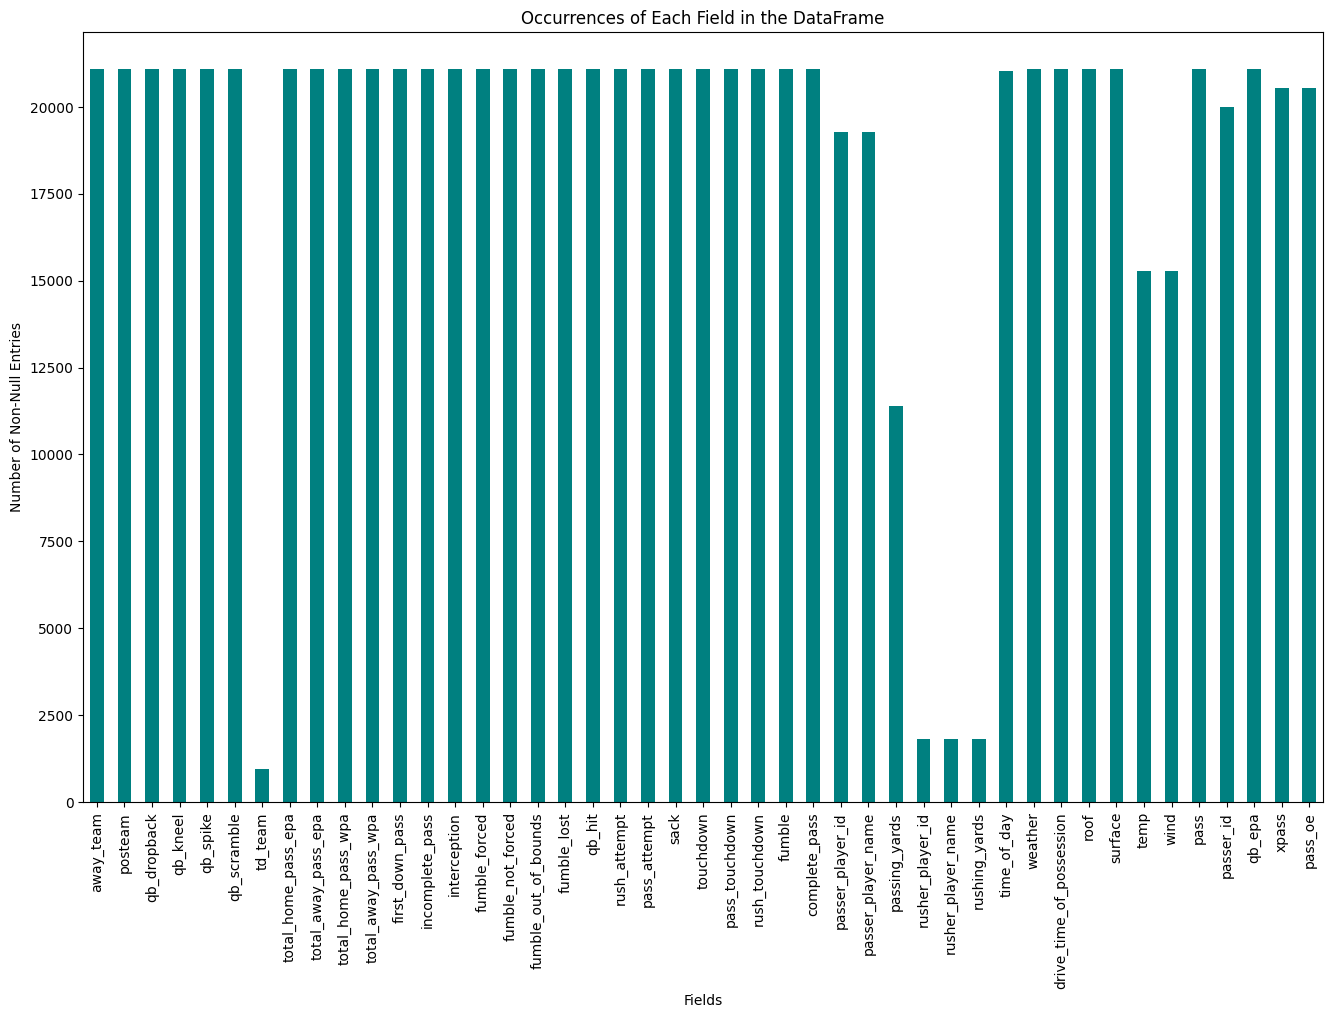

In [77]:
##########################################################################################################################
# graphed the number of items in each column
#
##########################################################################################################################

#Count non-null entries in each column
field_occurrences = new_filtered_file.notnull().sum()

#Plotting
plt.figure(figsize = (16, 10))  #Set the figure size for better readability
field_occurrences.plot(kind ='bar', color ='teal')
plt.title('Occurrences of Each Field in the DataFrame')
plt.xlabel('Fields')
plt.ylabel('Number of Non-Null Entries')
plt.xticks(rotation = 90)  #Rotate labels to prevent overlap
plt.show()

In [78]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for M.Ryan
#
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

player_stats = stat_file[stat_file['passer_player_name'] == 'M.Ryan']

#Count touchdowns where the touchdown team is the same as the possession team
td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

int_count = player_stats['interception'].sum()

if int_count > 0:
    td_int_ratio = td_count / int_count
else:
    td_int_ratio = float('inf')  #Define how to handle division by zero

print(f"Touchdowns: {td_count}")
print(f"Interceptions: {int_count}")
print(f"Touchdown to Interception Ratio: {td_int_ratio}")



Touchdowns: 26.0
Interceptions: 14.0
Touchdown to Interception Ratio: 1.8571428571428572


In [79]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for L.Jackson
#
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

#Filter the DataFrame for specific player
player_stats = stat_file[stat_file['passer_player_name'] == 'L.Jackson']

#Count touchdowns where the touchdown team is the same as the possession team
td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

int_count = player_stats['interception'].sum()

if int_count > 0:
    td_int_ratio = td_count / int_count
else:
    td_int_ratio = float('inf')  #Define how to handle division by zero

print(f"Touchdowns: {td_count}")
print(f"Interceptions: {int_count}")
print(f"Touchdown to Interception Ratio: {td_int_ratio}")



Touchdowns: 37.0
Interceptions: 8.0
Touchdown to Interception Ratio: 4.625


In [80]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for T.Brady
#
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

#Filter the DataFrame for specific player
player_stats = stat_file[stat_file['passer_player_name'] == 'T.Brady']

#Count touchdowns where the touchdown team is the same as the possession team
td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

int_count = player_stats['interception'].sum()

if int_count > 0:
    td_int_ratio = td_count / int_count
else:
    td_int_ratio = float('inf')  #Define how to handle division by zero

print(f"Touchdowns: {td_count}")
print(f"Interceptions: {int_count}")
print(f"Touchdown to Interception Ratio: {td_int_ratio}")


Touchdowns: 24.0
Interceptions: 9.0
Touchdown to Interception Ratio: 2.6666666666666665


In [81]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for all QBs in 2019 NFL season
#
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

for player in qb:

  #Filter the DataFrame for specific player
  player_stats = stat_file[stat_file['passer_player_name'] == player]

  #Count touchdowns where the touchdown team is the same as the possession team
  td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()


  int_count = player_stats['interception'].sum()


  if int_count > 0:
      td_int_ratio = td_count / int_count
  else:
      td_int_ratio = float('inf')  #Define how to handle division by zero

  print(f"Player: {player}")
  print(f"Touchdowns: {td_count}")
  print(f"Interceptions: {int_count}")
  print(f"Touchdown to Interception Ratio: {td_int_ratio} \n")


Player: L.Jackson
Touchdowns: 37.0
Interceptions: 8.0
Touchdown to Interception Ratio: 4.625 

Player: P.Mahomes
Touchdowns: 36.0
Interceptions: 7.0
Touchdown to Interception Ratio: 5.142857142857143 

Player: R.Wilson
Touchdowns: 33.0
Interceptions: 5.0
Touchdown to Interception Ratio: 6.6 

Player: D.Brees
Touchdowns: 28.0
Interceptions: 5.0
Touchdown to Interception Ratio: 5.6 

Player: D.Watson
Touchdowns: 29.0
Interceptions: 12.0
Touchdown to Interception Ratio: 2.4166666666666665 

Player: R.Tannehill
Touchdowns: 27.0
Interceptions: 7.0
Touchdown to Interception Ratio: 3.857142857142857 

Player: A.Rodgers
Touchdowns: 30.0
Interceptions: 6.0
Touchdown to Interception Ratio: 5.0 

Player: K.Cousins
Touchdowns: 28.0
Interceptions: 7.0
Touchdown to Interception Ratio: 4.0 

Player: M.Stafford
Touchdowns: 19.0
Interceptions: 5.0
Touchdown to Interception Ratio: 3.8 

Player: C.Wentz
Touchdowns: 27.0
Interceptions: 7.0
Touchdown to Interception Ratio: 3.857142857142857 

Player: D.Pre

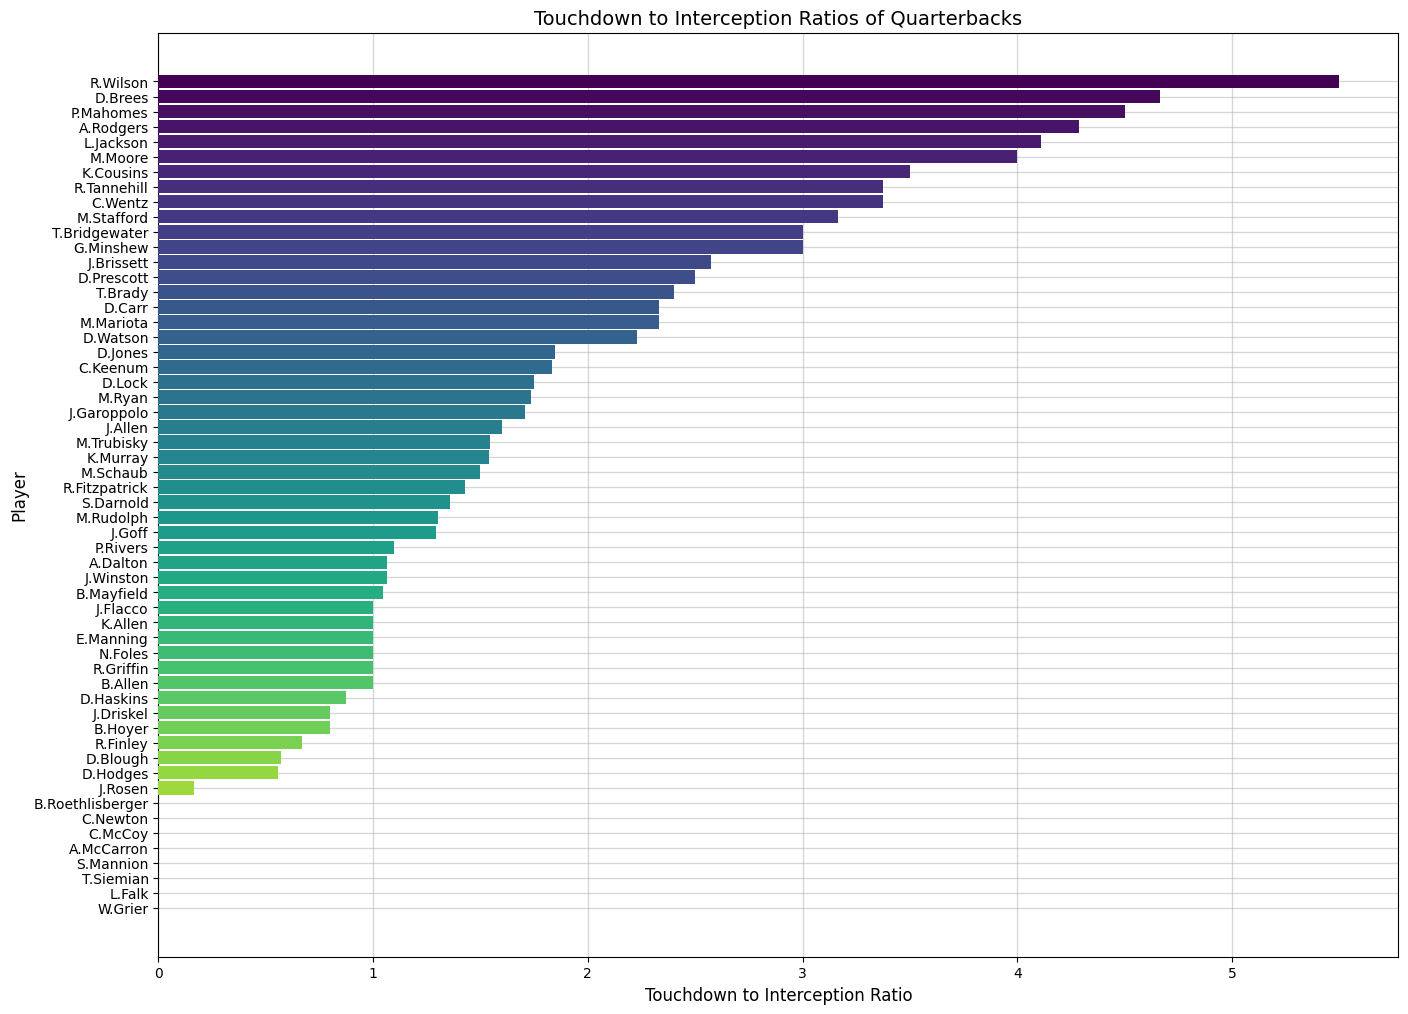

In [82]:
##########################################################################################################################
# Graphed all the td/int ratios for each QB in the 2019 NFL season in decending order
#
##########################################################################################################################

# Load data
stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

# Dictionary to hold player ratios
player_ratios = {}

for player in qb:
    # Filter the DataFrame for the specific player
    player_stats = stat_file[stat_file['passer_player_name'] == player]

    # Count touchdowns where the touchdown team is the same as the possession team
    td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

    # Count interceptions directly
    int_count = ((player_stats['interception'].sum()) + 1)

    # Calculate the touchdown to interception ratio
    if int_count > 0:
        td_int_ratio = td_count / int_count
    else:
        td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

    # Store the ratio
    player_ratios[player] = td_int_ratio


# Sort the dictionary by values in descending order
sorted_ratios = sorted(player_ratios.items(), key = lambda x: x[1], reverse = True)
players, ratios = zip(*sorted_ratios)

# Setting up the plot with specified size
fig, ax = plt.subplots(figsize = (16, 12))

# Using a color map that changes with the values
colors = plt.cm.viridis(np.linspace(0, 1, len(players)))

#plot type
ax.barh(players, ratios, color = colors, zorder = 3, height = 0.9)

# Customizing plot appearance
ax.set_xlabel('Touchdown to Interception Ratio', fontsize = 12)
ax.set_ylabel('Player', fontsize = 12)
ax.set_title('Touchdown to Interception Ratios of Quarterbacks', fontsize = 14)

# Rotating x-ticks is generally more relevant for vertical bar charts; for horizontal, adjust y-ticks if needed
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Adding grid lines for better readability
ax.grid(True, linestyle = '-', which = 'both', alpha = 0.5, zorder = 2, linewidth = 0.95)

# Inverting the y-axis to have the largest bar at the top if desired
ax.invert_yaxis()

plt.show()


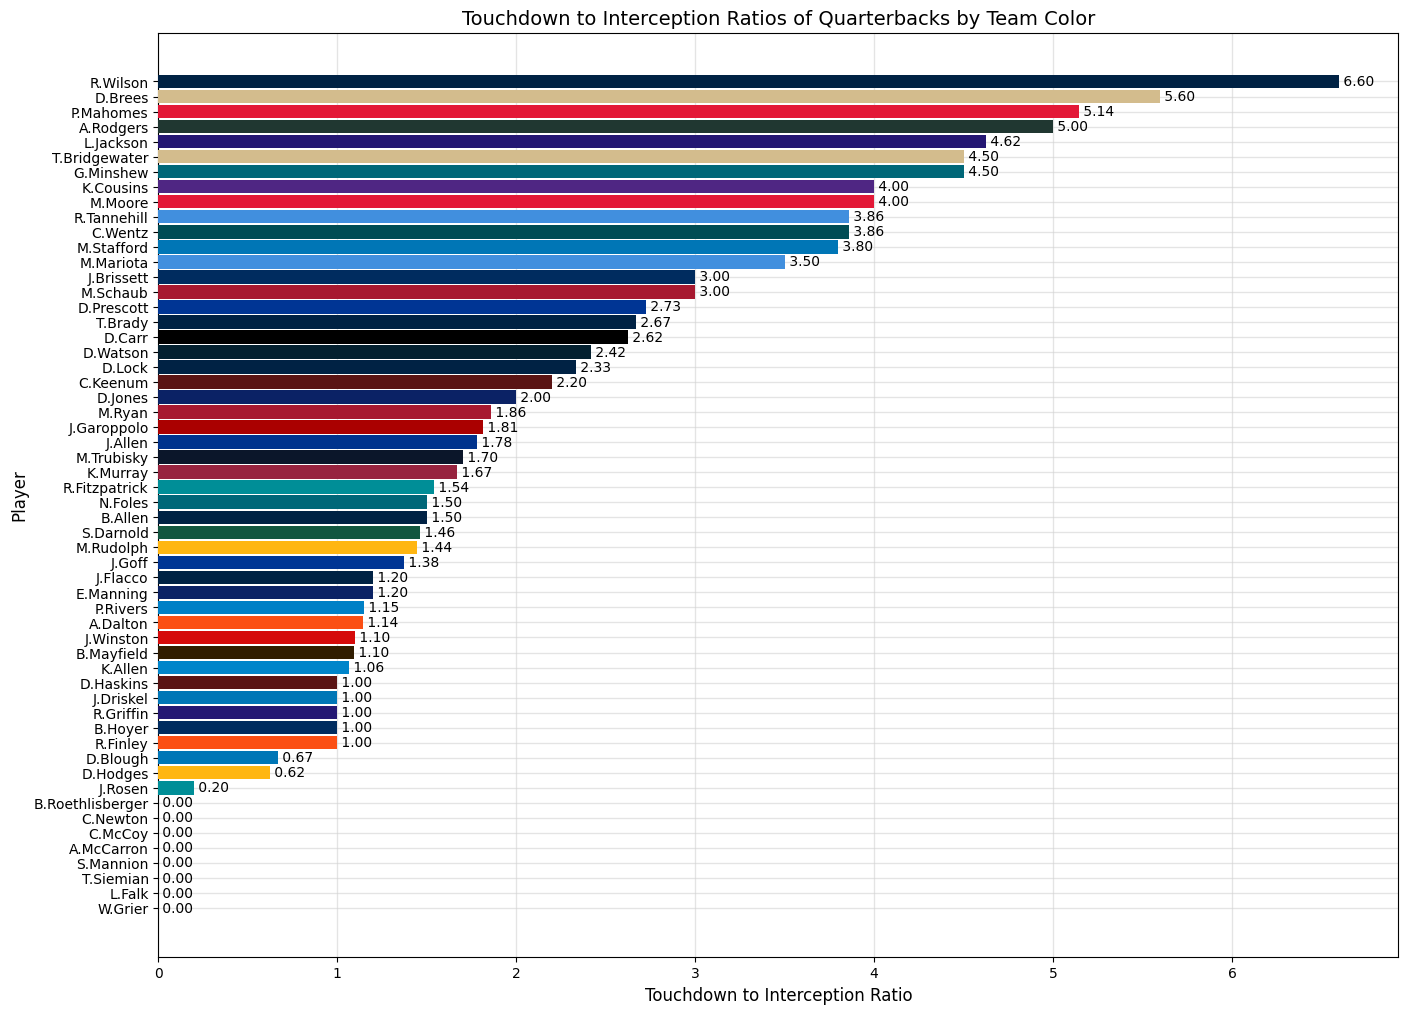

In [83]:
##########################################################################################################################
# Graphed all the td/int ratios for each QB in the 2019 NFL season in decending order.
#  Color coded by team color and value next to bar
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

# Generate a unique color for each team using a colormap
teams = stat_file['posteam'].unique()

team_colors = {
    'ARI': '#97233F',  # Arizona Cardinals Red
    'ATL': '#a71930',  # Atlanta Falcons Red
    'BAL': '#241773',  # Baltimore Ravens Purple
    'BUF': '#00338D',  # Buffalo Bills Blue
    'CAR': '#0085CA',  # Carolina Panthers Blue
    'CHI': '#0B162A',  # Chicago Bears Navy Blue
    'CIN': '#fb4f14',  # Cincinnati Bengals Orange
    'CLE': '#311D00',  # Cleveland Browns Brown
    'DAL': '#003594',  # Dallas Cowboys Blue
    'DEN': '#002244',  # Denver Broncos Navy Blue
    'DET': '#0076b6',  # Detroit Lions Blue
    'GB':  '#203731',  # Green Bay Packers Green
    'HOU': '#03202f',  # Houston Texans Navy Blue
    'IND': '#002C5F',  # Indianapolis Colts Blue
    'JAX': '#006778',  # Jacksonville Jaguars Teal
    'KC':  '#E31837',  # Kansas City Chiefs Red
    'LA':  '#003594',  # Los Angeles Rams Blue
    'LAC': '#0080C6',  # Los Angeles Chargers Blue
    'MIA': '#008E97',  # Miami Dolphins Aqua
    'MIN': '#4F2683',  # Minnesota Vikings Purple
    'NE':  '#002244',  # New England Patriots Navy Blue
    'NO':  '#D3BC8D',  # New Orleans Saints Gold
    'NYG': '#0B2265',  # New York Giants Blue
    'NYJ': '#125740',  # New York Jets Green
    'LV':  '#000000',  # Las Vegas Raiders Black
    'PHI': '#004C54',  # Philadelphia Eagles Green
    'PIT': '#FFB612',  # Pittsburgh Steelers Gold
    'SF':  '#AA0000',  # San Francisco 49ers Red
    'SEA': '#002244',  # Seattle Seahawks Navy Blue
    'TB':  '#D50A0A',  # Tampa Bay Buccaneers Red
    'TEN': '#418FDE',  # Tennessee Titans Navy Oiler Blue (Titan Blue: 4B92DB)
    'WAS': '#5A1414',  # Washington Commanders Burgundy
}


# Dictionary to hold player ratios
player_ratios = {}
player_teams = {}  # Dictionary to keep track of each player's team for coloring

for player in qb:
    # Filter the DataFrame for the specific player
    player_stats = stat_file[stat_file['passer_player_name'] == player]

    # Get the team of the player (assuming 'posteam' represents the team)
    # If the player has multiple teams, take the first one
    player_team = player_stats['posteam'].iloc[0] if not player_stats.empty else 'UNK'
    player_teams[player] = player_team # Populate the player_teams dictionary

    # Count touchdowns where the touchdown team is the same as the possession team
    td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

    # Count interceptions directly
    int_count = player_stats['interception'].sum()

    # Calculate the touchdown to interception ratio
    if int_count > 0:
        td_int_ratio = td_count / int_count
    #elif td_count > 0 and int_count <= 0:
    #    td_int_ratio = td_count / (int_count + 1)  #Add 1 to avoid division by zero
    else:
        td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

    # Store the ratio
    player_ratios[player] = td_int_ratio

# Sort the dictionary by values in descending order
sorted_ratios = sorted(player_ratios.items(), key = lambda x: x[1], reverse = True)
players, ratios = zip(*sorted_ratios)

# Plot setup
fig, ax = plt.subplots(figsize = (16, 12))

# Create horizontal bar chart using the team colors
for player, ratio in zip(players, ratios):
    team_color = team_colors.get(player_teams[player], 'gray')  # Default to 'gray' if no team is found
    ax.barh(player, ratio, color = team_color, height = 0.9, zorder = 3) #type of graph


    # Add text label to the right of each bar
    ax.text(ratio, player, f' {ratio:.2f}', va = 'center', ha = 'left', fontsize = 10)


ax.set_xlabel('Touchdown to Interception Ratio', fontsize = 12)
ax.set_ylabel('Player', fontsize = 12)
ax.set_title('Touchdown to Interception Ratios of Quarterbacks by Team Color', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
ax.grid(True, linestyle='-', linewidth = 0.95, color = 'lightgray', which = 'both', zorder = 2, alpha = 0.6)

# Invert y-axis to display the highest values at the top
ax.invert_yaxis()

plt.show()

In [84]:
##########################################################################################################################
# got all the distinct items in the 'roof' and 'surface' columns
##########################################################################################################################

temp_stat_file1 = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

print(temp_stat_file1['roof'].unique())
print(temp_stat_file1['surface'].unique())


['dome' 'outdoors' 'closed' 'open']
['sportturf' 'grass' 'fieldturf' 'astroturf']


In [85]:
##########################################################################################################################
# creatd logic to determine how to handel/convert the 'roof'  and  surface' column strings in to numbers
##########################################################################################################################

temp_stat_file2 = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

temp_stat_file2['roof'] = np.where(
    temp_stat_file2['temp'].isnull(),  # Condition for when temperature is null
    1,  # Value to assign if condition is True (temp is null)
    0   # Value to assign if condition is False (temp is not null)
)

#temp_stat_file2['surface'] = temp_stat_file2['surface'].str.lower().replace({'grass': 0}).fillna(1)
temp_stat_file2['surface'] = temp_stat_file2['surface'].apply(lambda x: 0 if x.lower() == 'grass' else 1)

temp_stat_file2.to_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv', index = False)



In [86]:
##########################################################################################################################
# got updated datatypes of each column before handling 'roof' and 'surface'
##########################################################################################################################

df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')
print(df.dtypes)

away_team                    object
posteam                      object
qb_dropback                 float64
qb_kneel                      int64
qb_spike                      int64
qb_scramble                   int64
td_team                      object
total_home_pass_epa         float64
total_away_pass_epa         float64
total_home_pass_wpa         float64
total_away_pass_wpa         float64
first_down_pass             float64
incomplete_pass             float64
interception                float64
fumble_forced               float64
fumble_not_forced           float64
fumble_out_of_bounds        float64
fumble_lost                 float64
qb_hit                      float64
rush_attempt                float64
pass_attempt                float64
sack                        float64
touchdown                   float64
pass_touchdown              float64
rush_touchdown              float64
fumble                      float64
complete_pass               float64
passer_player_id            

In [87]:
##########################################################################################################################
# got updated datatypes of each column after handling 'roof' and 'surface'
##########################################################################################################################

df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv')
print(df.dtypes)

away_team                    object
posteam                      object
qb_dropback                 float64
qb_kneel                      int64
qb_spike                      int64
qb_scramble                   int64
td_team                      object
total_home_pass_epa         float64
total_away_pass_epa         float64
total_home_pass_wpa         float64
total_away_pass_wpa         float64
first_down_pass             float64
incomplete_pass             float64
interception                float64
fumble_forced               float64
fumble_not_forced           float64
fumble_out_of_bounds        float64
fumble_lost                 float64
qb_hit                      float64
rush_attempt                float64
pass_attempt                float64
sack                        float64
touchdown                   float64
pass_touchdown              float64
rush_touchdown              float64
fumble                      float64
complete_pass               float64
passer_player_id            

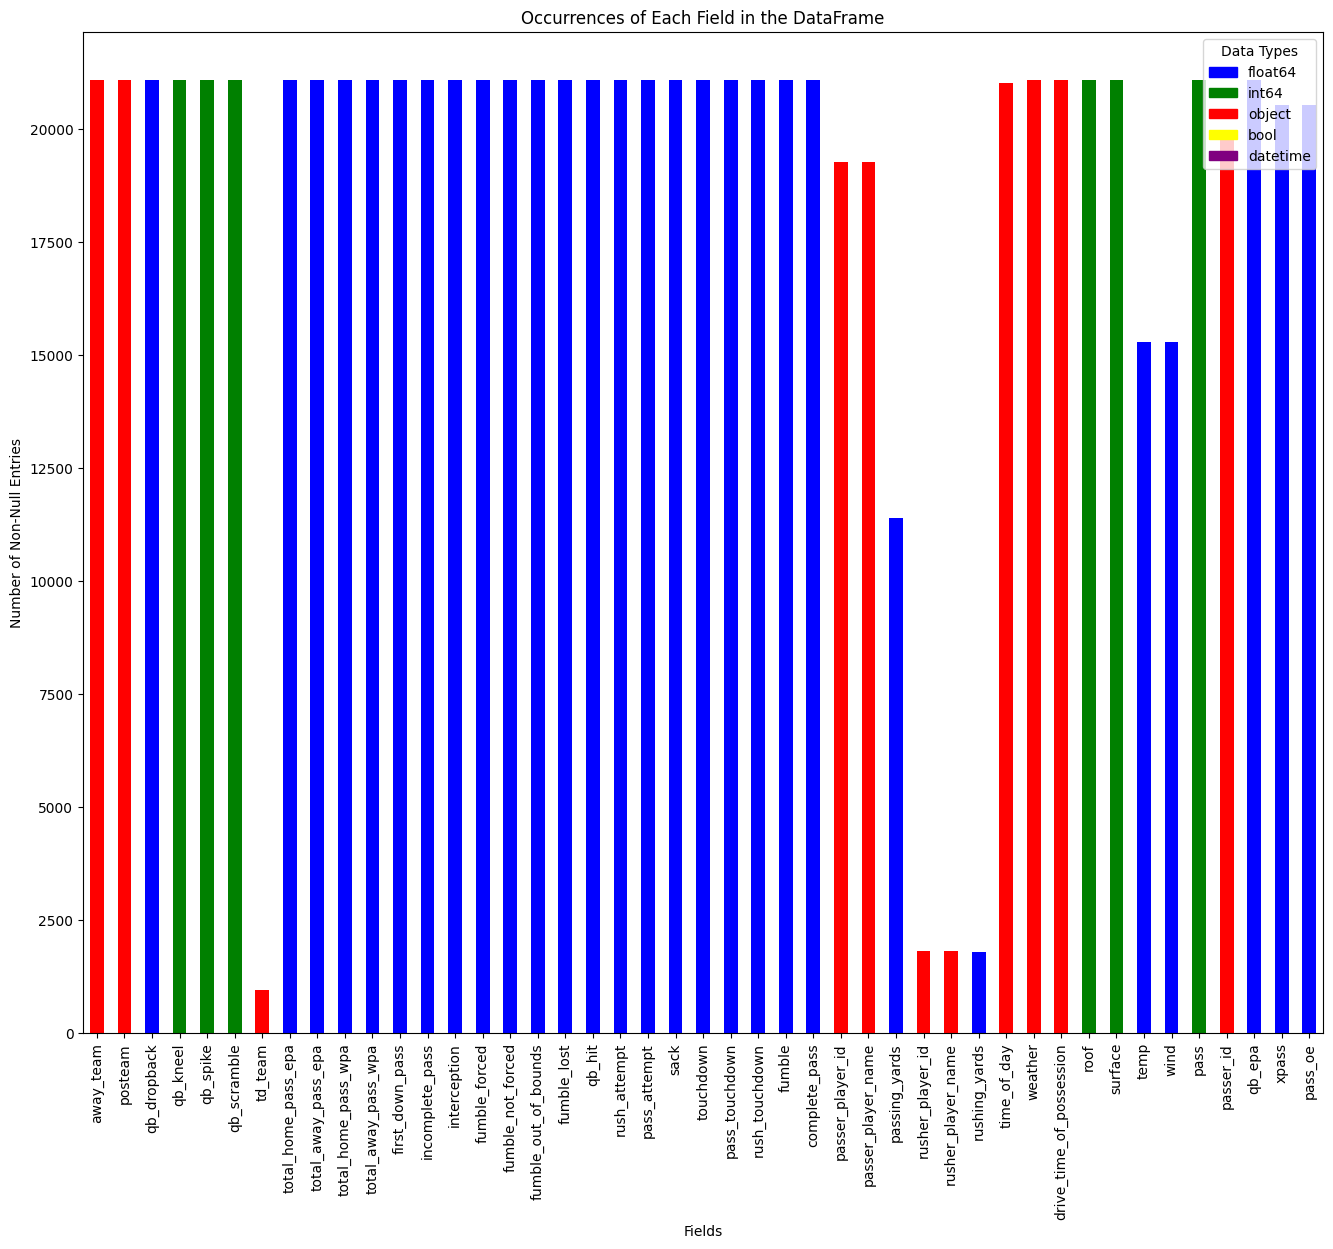

In [88]:
##########################################################################################################################
# graphed the number of items in each column, but this time changed to represent the datatypes of each column and new
#  datatypes of both "roof" and 'surface'
##########################################################################################################################

df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv')


# Assuming 'new_filtered_file' is your DataFrame
field_occurrences = df.notnull().sum()

# Create a dictionary to map data types to colors
data_type_colors = {
    'float64': 'blue',
    'int64': 'green',
    'object': 'red',  # For string types
    'bool': 'yellow',
    'datetime': 'purple',
    # Add more data types and colors as needed
}

# Get the data type of each column, then apply the color mapping
colors = [data_type_colors[str(dtype)] for dtype in df.dtypes]

# Plotting
plt.figure(figsize=(16, 13))  # Set the figure size for better readability
bars = field_occurrences.plot(kind='bar', color=colors)
plt.title('Occurrences of Each Field in the DataFrame')
plt.xlabel('Fields')
plt.ylabel('Number of Non-Null Entries')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap

# Create legend
legend_patches = [mpatches.Patch(color=color, label=dtype) for dtype, color in data_type_colors.items()]
plt.legend(handles=legend_patches, title="Data Types")

plt.show()

In [89]:
##########################################################################################################################
# converted the 'time_of_day' to daytime object type
#
##########################################################################################################################


df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv')

df['time_of_day'] = pd.to_datetime(df['time_of_day'])


df.to_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', index = False)


In [90]:
##########################################################################################################################
# listed all datatypes again but this time to reflect the new daytime objects
#
##########################################################################################################################

# Load the CSV with the 'parse_dates' parameter specifying which columns to parse as datetime
df_new = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', parse_dates = ['time_of_day'])

# Print the data types of all columns
print(df_new.dtypes)


away_team                                object
posteam                                  object
qb_dropback                             float64
qb_kneel                                  int64
qb_spike                                  int64
qb_scramble                               int64
td_team                                  object
total_home_pass_epa                     float64
total_away_pass_epa                     float64
total_home_pass_wpa                     float64
total_away_pass_wpa                     float64
first_down_pass                         float64
incomplete_pass                         float64
interception                            float64
fumble_forced                           float64
fumble_not_forced                       float64
fumble_out_of_bounds                    float64
fumble_lost                             float64
qb_hit                                  float64
rush_attempt                            float64
pass_attempt                            

In [91]:
##########################################################################################################################
# Test of daytime object
#
##########################################################################################################################

df_reloaded = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', parse_dates=['time_of_day'])
print(df_reloaded['time_of_day'].dtype)


datetime64[ns, UTC]


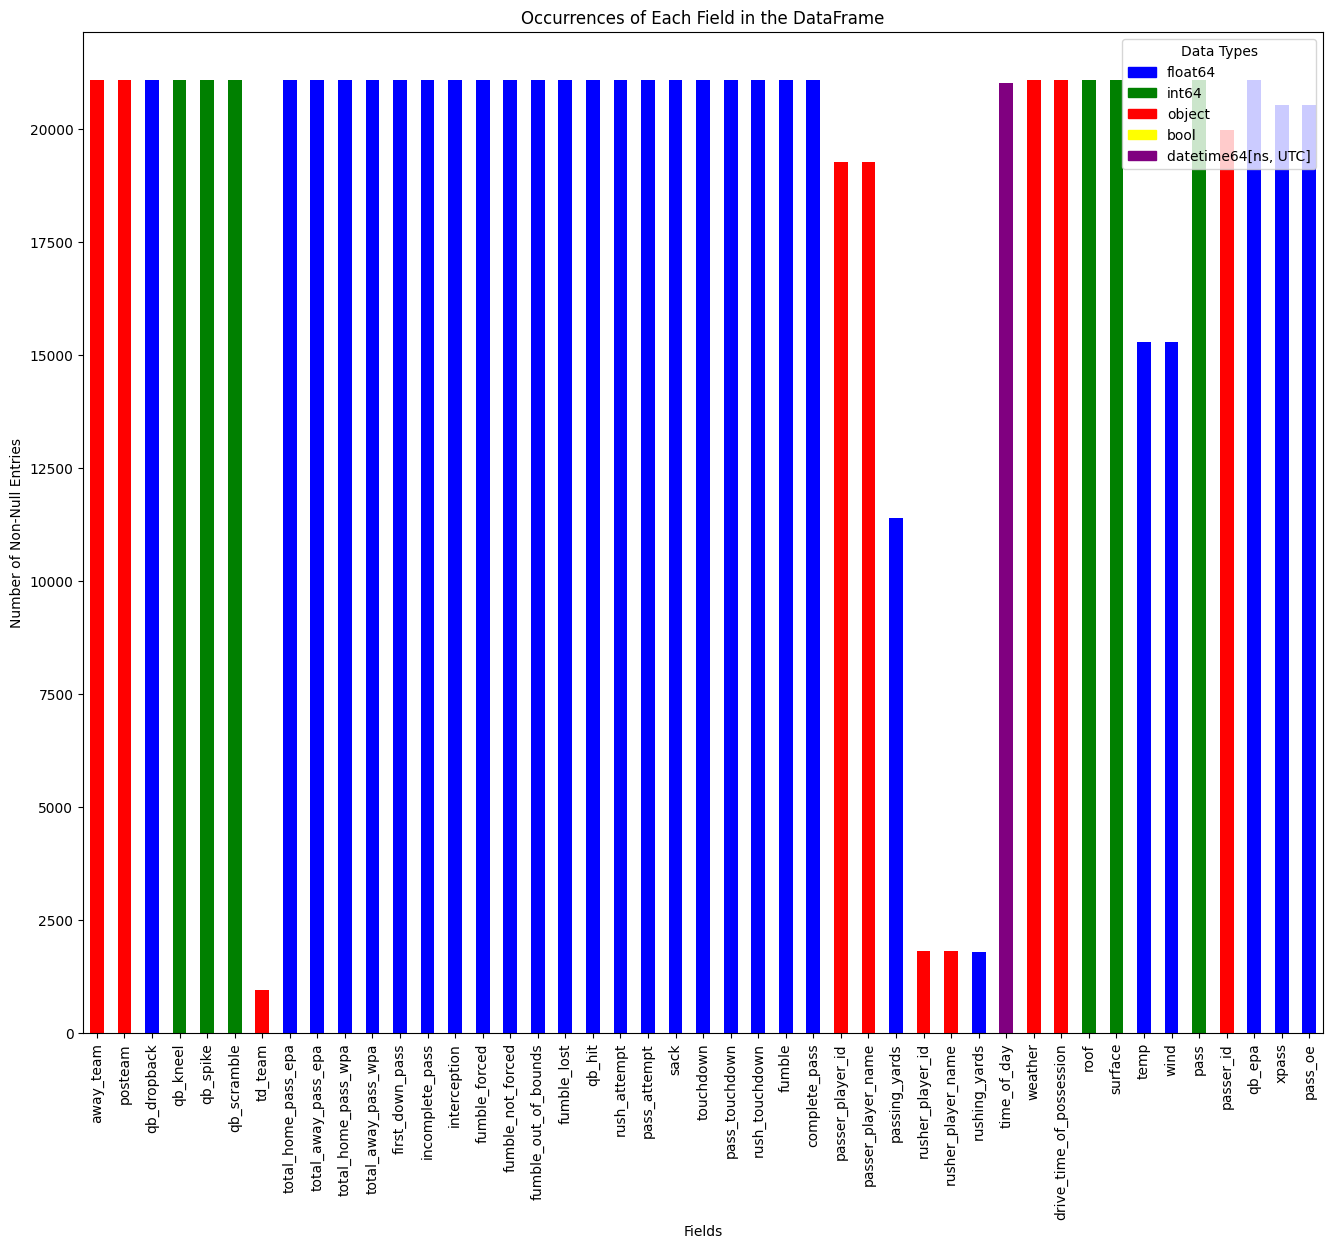

In [92]:
##########################################################################################################################
# Updated column # graph to reflcet the new daytime objects colored in purple now intead of red
#
##########################################################################################################################

df_reloaded = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', parse_dates = ['time_of_day'])


# Assuming 'new_filtered_file' is your DataFrame
field_occurrences = df_reloaded.notnull().sum()

# Create a dictionary to map data types to colors
data_type_colors = {
    'float64': 'blue',
    'int64': 'green',
    'object': 'red',  # For string types
    'bool': 'yellow',
    'datetime64[ns, UTC]': 'purple',
    # Add more data types and colors as needed
}

# Get the data type of each column, then apply the color mapping
colors = [data_type_colors[str(dtype)] for dtype in df_reloaded.dtypes]

# Plotting
plt.figure(figsize=(16, 13))  # Set the figure size for better readability
bars = field_occurrences.plot(kind='bar', color=colors)
plt.title('Occurrences of Each Field in the DataFrame')
plt.xlabel('Fields')
plt.ylabel('Number of Non-Null Entries')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap

# Create legend
legend_patches = [mpatches.Patch(color=color, label=dtype) for dtype, color in data_type_colors.items()]
plt.legend(handles=legend_patches, title="Data Types")

plt.show()

In [22]:
# example of how to slice the first 3 indicies of the player_id string and convert them to integers

#temp_stat_file2['player_id_int'] = temp_stat_file2['player_id'].apply(lambda x: int(x[3:]))
#temp_stat_file2.to_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_player_id_int.csv', index = False)

In [ ]:
#to filter time of day column 14:00 - 01:00 is non primetime and 01:10 to 5:00 is primetime UTC
# CST --> UTC --> Military
# non primetime in cst is 8:00 am - 7:00 pm and primetime in cst is 7:10 pm - 11:00 pm
# primetime = 1 and non primetime = 0

#temp_stat_file2['time_of_day'] = temp_stat_file2['time_of_day'].apply(lambda x: int(x[11:13]))
                                                                                #if primetime then = 1 else = 0 and if null also = 0
#temp_stat_file2['time_of_day'] = temp_stat_file2['time_of_day'].apply(lambda x: 1 if 1 <= x <= 5 else 0)



# Function to determine if the time is primetime
#def determine_primetime(datetime_str):
#    if pd.isna(datetime_str):
#        return 0  # Return 0 for null values
#    hour = int(datetime_str[11:13])  # Extract the hour part from the datetime string '2019-11-03T14:36:22Z'

    # Define primetime as from 01:00 to 05:00 UTC
#    if 1 <= hour <= 5:
#        return 1
#    else:
#        return 0

# Assume temp_stat_file2 is your DataFrame and has been loaded
# Apply the function to the 'time_of_day' column
#temp_stat_file2['time_of_day'] = temp_stat_file2['time_of_day'].apply(determine_primetime)